In [7]:
# Initialising required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [9]:
# Read the data into a data frame
df_project = pd.read_csv("PCDA_UNCLEANED/projectfile.csv")
df_project

,DATE,Car_Registration,CPI,GDP,Interest_rate,Unemployment_rate,Inflation_rate,UK_Population,Unnamed: 8
0,1989-3,629232,0.738554,3.160000e+11,9.853333,7.733333,0.049560,28265000,NaN
1,1989-6,563103,5.210185,3.180000e+11,10.300000,7.033333,0.052773,28301000,NaN
2,1989-9,725421,0.173458,3.180000e+11,10.090000,6.966667,0.051167,28328000,NaN
3,1989-12,391767,0.325700,3.180000e+11,10.520000,6.700000,0.055040,28388000,NaN
4,1990-3,582546,0.708311,3.200000e+11,11.546667,6.966667,0.058380,28395000,NaN
...,...,...,...,...,...,...,...,...,...
129,2021-6,484448,7.326356,5.370000e+11,0.870733,4.600000,0.020517,32579000,NaN
130,2021-9,406641,2.304965,5.460000e+11,0.714733,4.500000,0.027723,32627000,NaN
131,2021-12,330567,9.792028,5.550000e+11,0.953300,4.100000,0.049073,32600000,NaN
132,2022-3,417560,3.314917,5.590000e+11,1.413300,3.700000,0.062187,32574000,NaN


In [10]:
df_project.pop("Unnamed: 8")
df_project=df_project.dropna()
df_project

,DATE,Car_Registration,CPI,GDP,Interest_rate,Unemployment_rate,Inflation_rate,UK_Population
0,1989-3,629232,0.738554,3.160000e+11,9.853333,7.733333,0.049560,28265000
1,1989-6,563103,5.210185,3.180000e+11,10.300000,7.033333,0.052773,28301000
2,1989-9,725421,0.173458,3.180000e+11,10.090000,6.966667,0.051167,28328000
3,1989-12,391767,0.325700,3.180000e+11,10.520000,6.700000,0.055040,28388000
4,1990-3,582546,0.708311,3.200000e+11,11.546667,6.966667,0.058380,28395000
...,...,...,...,...,...,...,...,...
129,2021-6,484448,7.326356,5.370000e+11,0.870733,4.600000,0.020517,32579000
130,2021-9,406641,2.304965,5.460000e+11,0.714733,4.500000,0.027723,32627000
131,2021-12,330567,9.792028,5.550000e+11,0.953300,4.100000,0.049073,32600000
132,2022-3,417560,3.314917,5.590000e+11,1.413300,3.700000,0.062187,32574000


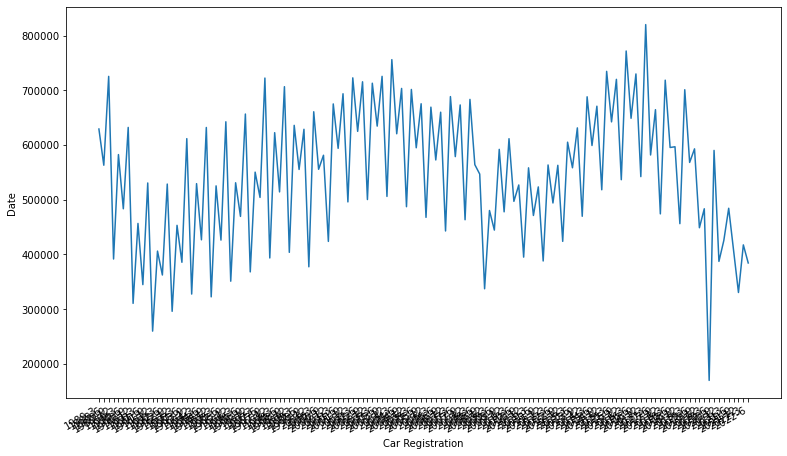

In [13]:
plt.plot(df_project['DATE'], df_project['Car_Registration'])
plt.xticks(rotation=30, ha='right')
plt.xlabel("Car Registration")
plt.ylabel("Date")
plt.rcParams['figure.figsize']=(12.8,7.2)

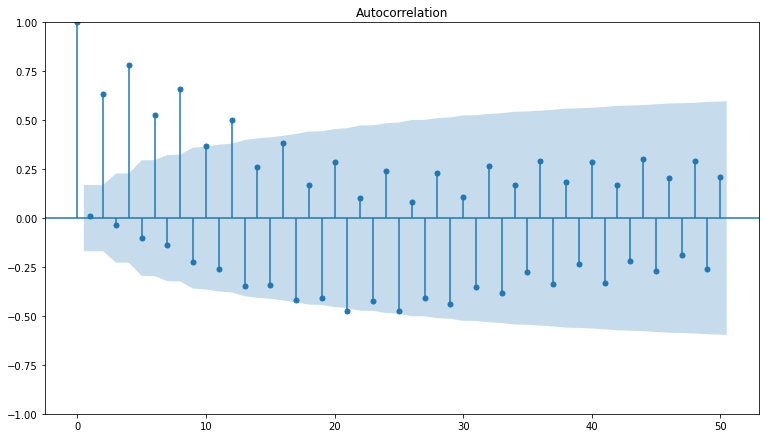

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
acf_plot = plot_acf(df_project['Car_Registration'],lags=50)

### According to the ACF plot, the autocorrelations are declining quickly towards zero which indicates no trend component. As this is quarterly data and there are significant spikes at every 4th lag, there is seasonal component

### Due the pressence of Seasonal component, we can fit the data with below models
    1. Multiple Regression Model
    2. Seasonal ARIMA Model
    3. XgBoost Model


# Multiple Regression

In [27]:
df_project['DateIndex'] = np.arange(len(df_project.index))

df_project.head()

,DATE,Car_Registration,CPI,GDP,Interest_rate,Unemployment_rate,Inflation_rate,UK_Population,DateIndex
0,1989-3,629232,0.738554,3.160000e+11,9.853333,7.733333,0.049560,28265000,0
1,1989-6,563103,5.210185,3.180000e+11,10.300000,7.033333,0.052773,28301000,1
2,1989-9,725421,0.173458,3.180000e+11,10.090000,6.966667,0.051167,28328000,2
3,1989-12,391767,0.325700,3.180000e+11,10.520000,6.700000,0.055040,28388000,3
4,1990-3,582546,0.708311,3.200000e+11,11.546667,6.966667,0.058380,28395000,4


In [50]:
#Setting the value for X and Y
X = df_project[['Interest_rate', 'CPI', 'GDP','Unemployment_rate','Inflation_rate','UK_Population']]
y = df_project['Car_Registration']

In [51]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [52]:
X_train.head()

,Interest_rate,CPI,GDP,Unemployment_rate,Inflation_rate,UK_Population
0,9.853333,0.738554,3.160000e+11,7.733333,0.049560,28265000
1,10.300000,5.210185,3.180000e+11,7.033333,0.052773,28301000
2,10.090000,0.173458,3.180000e+11,6.966667,0.051167,28328000
3,10.520000,0.325700,3.180000e+11,6.700000,0.055040,28388000
4,11.546667,0.708311,3.200000e+11,6.966667,0.058380,28395000


In [53]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

In [54]:
model = sm.OLS(y_train, X_train).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Car_Registration   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     8.335
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.26e-06
Time:                        20:38:20   Log-Likelihood:                -1383.9
No. Observations:                 107   AIC:                             2780.
Df Residuals:                     101   BIC:                             2796.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interest_rate      1.422e+04   1.35e+04      1.052      0.295   -1.26e+04     4.1e+04
CPI                 527.6584   4555.154      0.116      0.908   -8508.543    9563.859
GDP                6.748e-08   9.26e-07      0.073      0.942   -1.77e-06     1.9e-06
Unemployment_rate -2.543e+04   1.03e+04     -2.464      0.015   -4.59e+04   -4958.530
Inflation_rate    -2.502e+06   7.39e+05     -3.387      0.001   -3.97e+06   -1.04e+06
UK_Population         0.0231      0.017      1.340      0.183      -0.011       0.057
==============================================================================
Omnibus:                        9.273   Durbin-Watson:                   3.136
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                4.073
Skew:                          -0.205   Prob(JB):                        0.131
Kurtosis:                       2.137   Cond. No.                     3.10e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Slope for Interest_rate, CPI, GDP, and UK_Population is positive which means these are statistically significant. But the p-value for most of the variables is greater than alpha except Unemployment_rate and Inflation_rate. 

### We are excluding CPI because Inflation_rate and CPI are related to each other

In [56]:
model1 = smf.ols(formula='Car_Registration ~ Interest_rate + GDP + Unemployment_rate + Inflation_rate + UK_Population', data=df_project).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Interest_rate,1.422e+04,1.35e+04,1.052,0.295,-1.26e+04,4.1e+04
CPI,527.6584,4555.154,0.116,0.908,-8508.543,9563.859
GDP,6.748e-08,9.26e-07,0.073,0.942,-1.77e-06,1.9e-06
Unemployment_rate,-2.543e+04,1.03e+04,-2.464,0.015,-4.59e+04,-4958.530
Inflation_rate,-2.502e+06,7.39e+05,-3.387,0.001,-3.97e+06,-1.04e+06
UK_Population,0.0231,0.017,1.340,0.183,-0.011,0.057


In [57]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Car_Registration   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     10.25
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.82e-08
Time:                        20:38:21   Log-Likelihood:                -1739.9
No. Observations:                 134   AIC:                             3492.
Df Residuals:                     128   BIC:                             3509.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.042e+05    5.1e+05      0.989      0.325   -5.05e+05    1.51e+06
Interest_rate      4.033e+04   1.17e+04      3.455      0.001    1.72e+04    6.34e+04
GDP                2.349e-06   5.57e-07      4.216      0.000    1.25e-06    3.45e-06
Unemployment_rate -1638.9901   7877.509     -0.208      0.836   -1.72e+04    1.39e+04
Inflation_rate    -2.942e+06   7.93e+05     -3.707      0.000   -4.51e+06   -1.37e+06
UK_Population        -0.0365      0.020     -1.859      0.065      -0.075       0.002
==============================================================================
Omnibus:                        5.150   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                2.701
Skew:                          -0.030   Prob(JB):                        0.259
Kurtosis:                       2.307   Cond. No.                     4.18e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p-value for Unemployment_rate and UK_Population is greater than alpha. So we will be creating interaction terms based on these two variables. 

In [58]:
mi = smf.ols(formula='Car_Registration ~ Interest_rate + GDP + Unemployment_rate + Inflation_rate + UK_Population + Interest_rate*Unemployment_rate + Interest_rate*UK_Population + Unemployment_rate*UK_Population', data=df_project)
model2 = mi.fit()
summary = model2.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.738e+06,2.19e+06,1.252,0.213,-1.59e+06,7.07e+06
Interest_rate,1.6e+05,1.8e+05,0.889,0.376,-1.96e+05,5.16e+05
GDP,2.555e-06,7.3e-07,3.500,0.001,1.11e-06,4e-06
Unemployment_rate,-4.394e+05,3.35e+05,-1.313,0.191,-1.1e+06,2.23e+05
Inflation_rate,-3.03e+06,7.88e+05,-3.843,0.000,-4.59e+06,-1.47e+06
UK_Population,-0.1121,0.071,-1.589,0.115,-0.252,0.028
Interest_rate:Unemployment_rate,2903.9072,6932.353,0.419,0.676,-1.08e+04,1.66e+04
Interest_rate:UK_Population,-0.0046,0.006,-0.819,0.414,-0.016,0.007
Unemployment_rate:UK_Population,0.0143,0.010,1.390,0.167,-0.006,0.035


In [59]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Car_Registration   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     7.348
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.59e-08
Time:                        20:38:22   Log-Likelihood:                -1736.6
No. Observations:                 134   AIC:                             3491.
Df Residuals:                     125   BIC:                             3517.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2.738e+06   2.19e+06      1.252      0.213   -1.59e+06    7.07e+06
Interest_rate                      1.6e+05    1.8e+05      0.889      0.376   -1.96e+05    5.16e+05
GDP                              2.555e-06    7.3e-07      3.500      0.001    1.11e-06       4e-06
Unemployment_rate               -4.394e+05   3.35e+05     -1.313      0.191    -1.1e+06    2.23e+05
Inflation_rate                   -3.03e+06   7.88e+05     -3.843      0.000   -4.59e+06   -1.47e+06
UK_Population                      -0.1121      0.071     -1.589      0.115      -0.252       0.028
Interest_rate:Unemployment_rate  2903.9072   6932.353      0.419      0.676   -1.08e+04    1.66e+04
Interest_rate:UK_Population        -0.0046      0.006     -0.819      0.414      -0.016       0.007
Unemployment_rate:UK_Population     0.0143      0.010      1.390      0.167      -0.006       0.035
==============================================================================
Omnibus:                        2.194   Durbin-Watson:                   2.739
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.618
Skew:                           0.048   Prob(JB):                        0.445
Kurtosis:                       2.470   Cond. No.                     1.07e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P-value for Interest_rate, Unemployment_rate, UK_Population, Interest_rate:Unemployment_rate, Interest_rate:UK_Population, and Unemployment_rate:UK_Population is greater than alpha. 

In [60]:
mi2 = smf.ols(formula='Car_Registration ~ Interest_rate + GDP + Unemployment_rate + Inflation_rate + UK_Population + Interest_rate*Unemployment_rate + GDP*Interest_rate', data=df_project)
model3 = mi2.fit()
summary = model3.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.516e+05,5.65e+05,0.799,0.426,-6.66e+05,1.57e+06
Interest_rate,1.765e+05,4.96e+04,3.555,0.001,7.82e+04,2.75e+05
GDP,3.464e-06,8.37e-07,4.139,0.000,1.81e-06,5.12e-06
Unemployment_rate,4.175e+04,1.6e+04,2.611,0.010,1.01e+04,7.34e+04
Inflation_rate,-3.243e+06,7.78e+05,-4.168,0.000,-4.78e+06,-1.7e+06
UK_Population,-0.0587,0.026,-2.246,0.026,-0.110,-0.007
Interest_rate:Unemployment_rate,-8574.6396,2788.928,-3.075,0.003,-1.41e+04,-3055.433
GDP:Interest_rate,-2.139e-07,9.24e-08,-2.315,0.022,-3.97e-07,-3.1e-08


In [61]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Car_Registration   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     9.115
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.43e-09
Time:                        20:38:22   Log-Likelihood:                -1735.0
No. Observations:                 134   AIC:                             3486.
Df Residuals:                     126   BIC:                             3509.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.516e+05   5.65e+05      0.799      0.426   -6.66e+05    1.57e+06
Interest_rate                    1.765e+05   4.96e+04      3.555      0.001    7.82e+04    2.75e+05
GDP                              3.464e-06   8.37e-07      4.139      0.000    1.81e-06    5.12e-06
Unemployment_rate                4.175e+04    1.6e+04      2.611      0.010    1.01e+04    7.34e+04
Inflation_rate                  -3.243e+06   7.78e+05     -4.168      0.000   -4.78e+06    -1.7e+06
UK_Population                      -0.0587      0.026     -2.246      0.026      -0.110      -0.007
Interest_rate:Unemployment_rate -8574.6396   2788.928     -3.075      0.003   -1.41e+04   -3055.433
GDP:Interest_rate               -2.139e-07   9.24e-08     -2.315      0.022   -3.97e-07    -3.1e-08
==============================================================================
Omnibus:                        4.997   Durbin-Watson:                   2.827
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                2.681
Skew:                          -0.053   Prob(JB):                        0.262
Kurtosis:                       2.315   Cond. No.                     2.01e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now after adding the interaction terms Interest_rate:Unemployment_rate and GDP:Interest_rate, all the independent variables p-value is less than alpha(0.05). Adj R-sqaure value improved after adding interaction terms. So, Model3 is the best fit model.

In [62]:
y_pred = model3.predict(X_test)
y_pred

107    629901.551466
108    618769.049512
109    615545.829903
110    604485.044588
111    592986.563510
112    568873.183342
113    542350.504973
114    560287.541321
115    551550.152228
116    558036.830399
117    572763.990858
118    585910.515765
119    580781.561811
120    591998.472538
121    580392.498503
122    597281.885337
123    595884.049195
124    541068.785502
125    196481.563478
126    479934.207373
127    514006.180514
128    491828.705203
129    545504.336734
130    542101.944987
131    495394.647331
132    465580.893707
133    384308.100673
dtype: float64

In [63]:
y_train = np.array(y_train).reshape((-1, 1))
model3.fittedvalues = np.array(model3.fittedvalues).reshape((-1, 1))

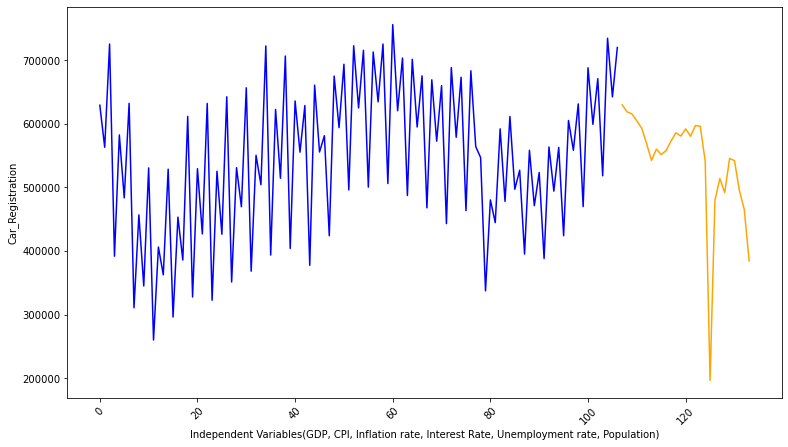

In [68]:
plt.plot(y_train, color = "Blue")
plt.plot(y_pred, color = "Orange")
plt.ylabel('Car_Registration')
plt.xlabel('Independent Variables(GDP, CPI, Inflation rate, Interest Rate, Unemployment rate, Population)')
plt.xticks(rotation=45)
plt.rcParams['figure.figsize']=(12.8,7.2)
plt.show()

In [69]:
from sklearn import metrics
MAPE_train=metrics.mean_absolute_percentage_error(y_train, model3.fittedvalues[0: 107])
print("The MAPE for Model fit is",MAPE_train)
MAPE_test=metrics.mean_absolute_percentage_error(y_test, y_pred)
print("The MAPE for Model Acc is",MAPE_test)

The MAPE for Model fit is 0.16977263405447934
The MAPE for Model Acc is 0.16536281669825825


In [70]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

C:\Users\Students\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,14.002003,Interest_rate
2,1.541846,CPI
3,23.797260,GDP
4,2.320262,Unemployment_rate
5,3.194522,Inflation_rate
6,15.497876,UK_Population


### vif for Interest_rate, GDP and UK_Population is greater than 10 which indicates these variable show multicollinearity

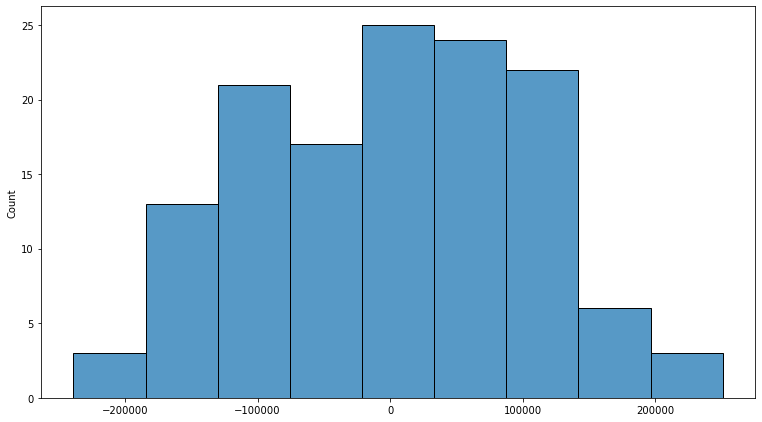

In [71]:
import seaborn as sns
sns.histplot(model3.resid);

In [72]:
model3.resid.head()

0    159473.262719
1     51746.722139
2    217562.434879
3   -133877.598197
4     29071.464898
dtype: float64

In [73]:
pred_resid = model3.resid.tail(len(y_pred))
pred_resid

107    -93284.551466
108    153010.950488
109     33310.170097
110    125373.955412
111    -50695.563510
112    251142.816658
113     39444.495027
114    104312.458679
115    -77344.152228
116    160452.169601
117     22741.009142
118     10915.484235
119   -124454.561811
120    109037.527462
121    -12183.498503
122     -4255.885337
123   -147015.049195
124    -57511.785502
125    -26536.563478
126    110219.792627
127   -126598.180514
128    -66303.705203
129    -61056.336734
130   -135460.944987
131   -164827.647331
132    -48020.893707
133       210.899327
dtype: float64

In [74]:
from scipy import stats
mu, std = stats.norm.fit(model3.resid)
mu, std

(-54.68605256254642, 101618.15519955572)

# Model Assumptions
## 1.	First, we assume that the relationship between the forecast variable and the predictor variable is linear
### The relationship between the forecast variable “Car_Registration” and the predictor variable is linear.
## 2.Second, we make the following assumptions about the errors:     
        * Residuals are normally distributed
        * Residuals have constant variance 
        * Residual terms are independent

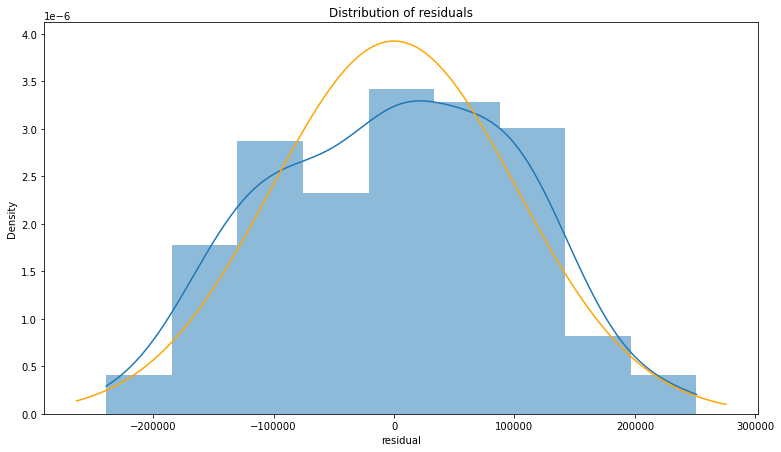

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model3.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

## According to the histogram, the residuals appear normally distributed, The assumption is true

[Text(0.5, 0, 'Predicted Values'), Text(0, 0.5, 'Residuals')]

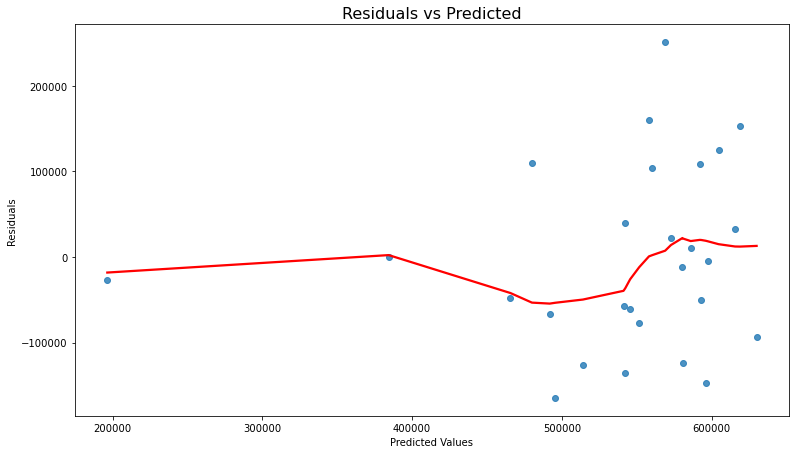

In [76]:
#Residual Vs Predicted Plot
fig, ax = plt.subplots(1,1)

sns.regplot(x=y_pred, y=pred_resid, lowess=True, ax=ax, line_kws={'color': 'red'})
ax.set_title('Residuals vs Predicted', fontsize=16)
ax.set(xlabel='Predicted Values', ylabel='Residuals')

## The residual vs. predicted value scatterplot shows no pattern that indicates that the equal variances assumption is correct.

In [77]:
#perform Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

3.1356745806537534

## As the Durbin-Watson statistic ranges from 0-4. The DW statistic close to zero indicate that there is positive serial correlation

# Model Evaluation
## 1.	Is the model logical? 
### The model is logical because the slope is positive for GDP, Unemployment_rate and Interest Rate which makes sense. With the increase in GDP, Unemployment_rate and Interest rate there is increase in Car Registration
## 2.	Is the slope term statistically significant? 
### The p-value for all the slope term is less than alpha, so independent variables are significant predictor.
## 3.	What percent of the variation in the dependent variable is explained by variation in the independent variable 
### AdjR2 = 30% so 30% of the variation in the dependent variable is explained by the independent variable

### Based on our best fit model (Model3), Below is the equation of line fit

### Predicting the Car Registration for next two quarters using the 2 predicted values of all the independent variables
Y = Intercept + (-0.00001765)*x1 + (0.0000034)*x2 + 0.000041*x3 + (-0.0000032)*x4 + (-0.0587)*x5 + (-8574.63)*x6 + (-0.00000021)*x7

##### Y = 0.000004516 - 0.00001765*2.175977 + 0.0000034*0.000000000056 + 0.000041*5.489589 - 0.0000032*0.194 - 0.0587*0.00000032 - 8574.63*(2.175977*5.489589) - 0.00000021*(0.000000000056*2.175977) 

#### Where Y = Car Registration
#### x1 = Interest_rate
#### x2 = GDP
#### x3 = Unemployment_rate
#### x4 = Inflation_rate
#### x5 = UK_Population
#### x6 = Interest_rate*Unemployment_rate
#### x7 = GDP*Interest_rate


In [94]:
Y1 =  0.000004516 - 0.00001765*2.175977 + 0.0000034*0.000000000056 + 0.000041*5.489589 - 0.0000032*0.2013 - 0.0587*0.00000032 - 8574.63*(2.175977*5.489589) - 0.00000021*(0.000000000056*2.175977)
Y1

-102425.83646290997

#### -102425.83646290997 is the predicted value for next quarter (Q4 of 2022)

### Predicting Car registration for first quarter of 2023

#### Y2 = Intercept + (-0.00001765)x1 + (0.0000034)x2 + 0.000041x3 + (-0.0000032)x4 + (-0.0587)x5 + (-8574.63)x6 + (-0.00000021)x7 = 0.000004516 - 0.000017652.175977 + 0.00000340.000000000056 + 0.0000415.489589 - 0.00000320.194 - 0.0587*0.00000032 - 8574.63(2.1759775.489589) - 0.00000021(0.000000000056*2.175977)


In [93]:
Y2 = 0.000004516 - 0.00001765*2.115355 + 0.0000034*0.0000000000561 + 0.000041*5.479231 - 0.0000032*0.187 - 0.0587*0.0000003259 - 8574.63*(2.115355*5.479231) - 0.00000021*(0.0000000000561*2.115355)  
Y2

-99384.40910081592

#### -99384.40910081592 is the predicted value for first quarter of 2023